In [39]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Load data
df = pd.read_csv('fake_job_postings.csv')

In [41]:
# Lihat beberapa baris awal
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [43]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [44]:
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (17880, 18)


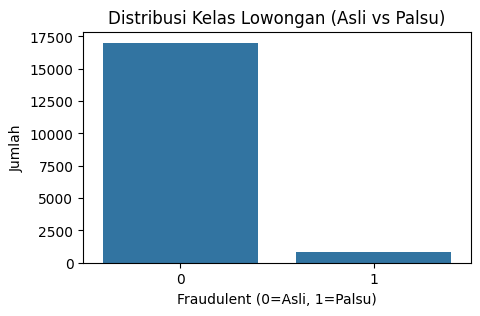

In [45]:
# Distribusi kelas target
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='fraudulent')
plt.title("Distribusi Kelas Lowongan (Asli vs Palsu)")
plt.xlabel("Fraudulent (0=Asli, 1=Palsu)")
plt.ylabel("Jumlah")
plt.show()

In [46]:
# Hapus kolom yang tidak informatif (jika ada)
drop_cols = ['job_id'] if 'job_id' in df.columns else []
df = df.drop(columns=drop_cols)

In [47]:
# Isi missing value
for col in df.select_dtypes(include=['object']):
    df[col] = df[col].fillna('Unknown')
for col in df.select_dtypes(include=['float64', 'int64']):
    df[col] = df[col].fillna(df[col].median())

In [48]:
# Cek ulang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   salary_range         17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

In [49]:
selected_columns = [
    'title', 'location', 'department', 'salary_range',
    'company_profile', 'description', 'requirements', 'benefits',
    'telecommuting', 'has_company_logo', 'has_questions',
    'employment_type', 'required_experience', 'required_education',
    'industry', 'function', 'fraudulent'
]

In [50]:
df = df[selected_columns]

In [51]:
# Cek fitur kategorikal dan numerik
categorical = ['title', 'location', 'department', 'salary_range',
               'company_profile', 'description', 'requirements', 'benefits',
               'employment_type', 'required_experience', 'required_education',
               'industry', 'function']
numeric = ['telecommuting', 'has_company_logo', 'has_questions']
target = 'fraudulent'

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer(max_features=100)
desc_tfidf = tfidf.fit_transform(df['description'])

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
cat_features = df[['employment_type', 'required_experience', 'required_education', 'industry', 'function']].astype(str)
cat_encoded = ohe.fit_transform(cat_features)

In [58]:
# Gabungkan fitur numerik dan TF-IDF serta OHE
X = np.hstack([desc_tfidf.toarray(), cat_encoded, df[numeric].values])
y = df[target].values

In [59]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [61]:
# SMOTE untuk mengatasi imbalance
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [62]:
print('Shape train:', X_train_sm.shape, 'Shape test:', X_test.shape)

Shape train: (27222, 301) Shape test: (3576, 301)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

In [64]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)
y_pred_lr = lr.predict(X_test)


In [65]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)

In [66]:
# Classification Report
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.90      0.95      3403
           1       0.31      0.86      0.46       173

    accuracy                           0.90      3576
   macro avg       0.65      0.88      0.70      3576
weighted avg       0.96      0.90      0.92      3576

Random Forest:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.64      0.78       173

    accuracy                           0.98      3576
   macro avg       0.99      0.82      0.88      3576
weighted avg       0.98      0.98      0.98      3576



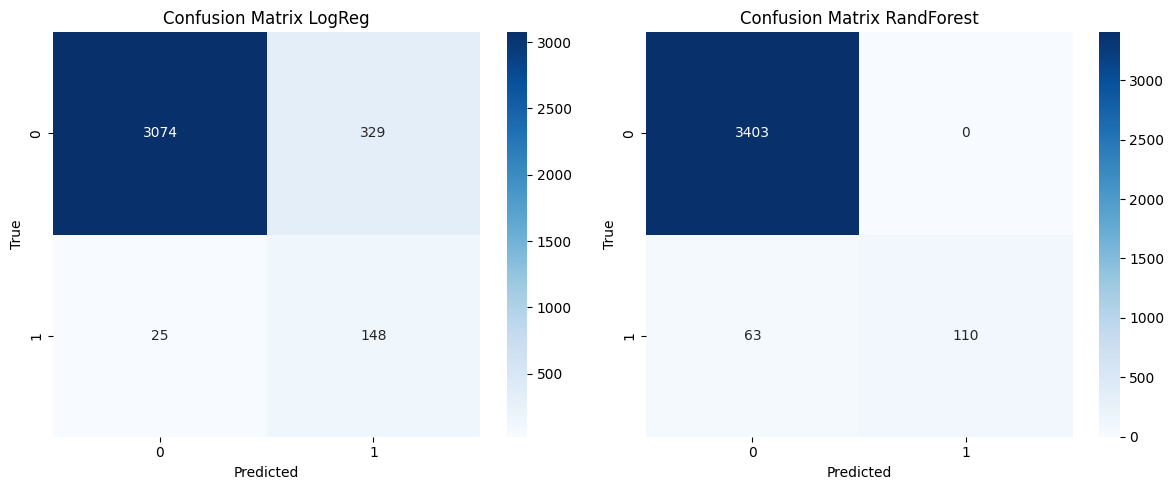

In [67]:
# Confusion Matrix
fig, axes = plt.subplots(1,2, figsize=(12,5))
for idx, (y_pred, name) in enumerate(zip([y_pred_lr, y_pred_rf], ["LogReg", "RandForest"])):
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f'Confusion Matrix {name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')
plt.tight_layout()
plt.show()

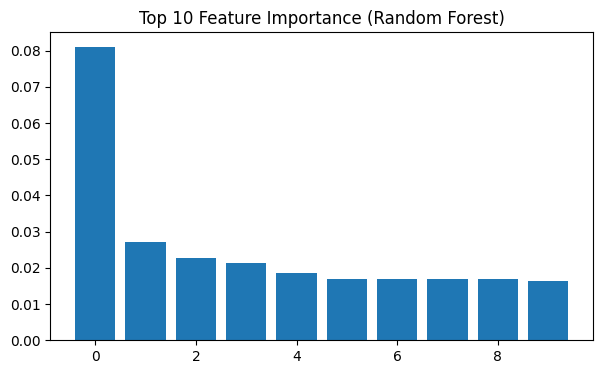

In [68]:
# Feature Importance (Random Forest)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(7,4))
plt.bar(range(10), importances[indices])
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()

In [70]:
import joblib

In [71]:
# Simpan setelah fit
joblib.dump(tfidf, 'tfidf.pkl')
joblib.dump(ohe, 'ohe.pkl')
joblib.dump(rf, 'rf.pkl')

['rf.pkl']